# Graphing
__Math 3080: Fundamentals of Data Science__

Reading:
* [McKinney: Chapter 9](https://wesmckinney.com/book/plotting-and-visualization)
* [Irizzary: Chapter 7](https://rafalab.dfci.harvard.edu/dsbook-part-1/dataviz/distributions.html)

-----

## Intro to Exploratory Data Analysis

We all want to do __machine learning__. However, we know that we can't just jump in - we have to prepare data.
* Obtain data
* Clean data
* Analyze data
* Prepare data
* Model
* Evaluate

We have learned how to obtain and clean the data, now we are going to analyze data. We often call this stage __exploratory data analysis__ (EDA).

Why do we do EDA?
* Explore how we can use each variable
  * What variables are related to each other?
  * What variables can be used?
  * Are there any patterns/trends in the data?
* Make a plan for our model

What is involved in EDA?
* Graphing
* Statistics

Let's find out how to make effective graphs in python. Today, we will just make graphs. The next two classes will focus on more intricate graphing (including interactive graphs) and analysis.

-----

## Graphing with Matplotlib

`matplotlib` is the basic package we use for data visualization. There are other packages that are built on matplotlib (like `seaborn`), and other packages which are independent of matplotlib (like some interactive graphs we'll see later). Today, we'll learn the basics of matplotlib.

First, load matplotlib. Let's also create a simple dataset we can work with:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
print(x)
y = x**2 + np.random.randn(len(x))/50
print(y)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[ 0.01992931  0.0241405   0.00894288  0.02502409 -0.01657077 -0.00752132
  0.03560209 -0.01703118  0.02138879 -0.01716307 -0.00454021  0.01751284
 -0.0157807  -0.02091211  0.00103471  0.0300553   0.02287159  0.03582497
  0.00484353  0.03843582  0.0271657   0.08508412  0.08591704  0.04364287
  0.04364407  0.05168513  0.05197432  0.08572834  0.05118729  0.09213098
  0.10516367  0.11784165  0.12452425  0.12343167  0.11796593  0.08982923
  0.18954947  0.14495115  0.16748645  0.16178639

Now, we need to create a frame for our figure and a set of axes:

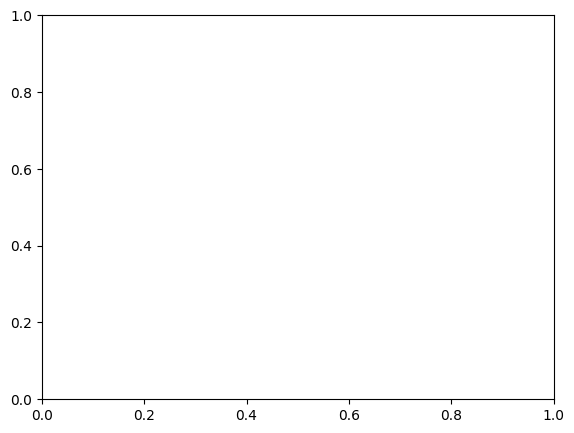

In [2]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
plt.show()

From here, we can go ahead and graph our data, or we can set up the environment some more. Here is a quick graph using our data.

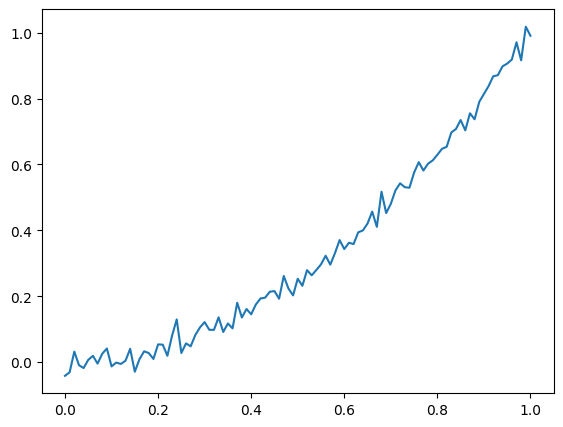

In [3]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x,y)
plt.show()

We can add information to the graph. For example, let's add a $y=x^2$ line, a title, axis labels, and a legend. And let's make the $y=x^2$ line dashed.

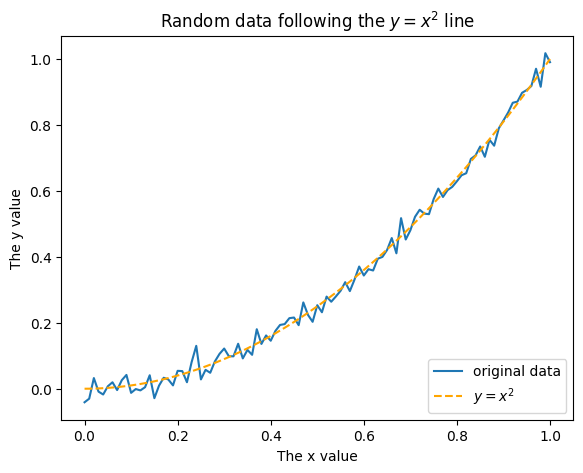

In [4]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(x,y, label='original data')
ax.plot(x,x**2,c='orange', linestyle='dashed', label='$y=x^2$')

plt.xlabel('The x value')
plt.ylabel('The y value')
plt.title('Random data following the $y=x^2$ line')

ax.legend(loc='lower right')
plt.show()

Now, let's say that we want an inset, like a zoom-in view, of the range $x=[0.4,0.5]$.

Note that I am also resizing the figure to the size I would like.

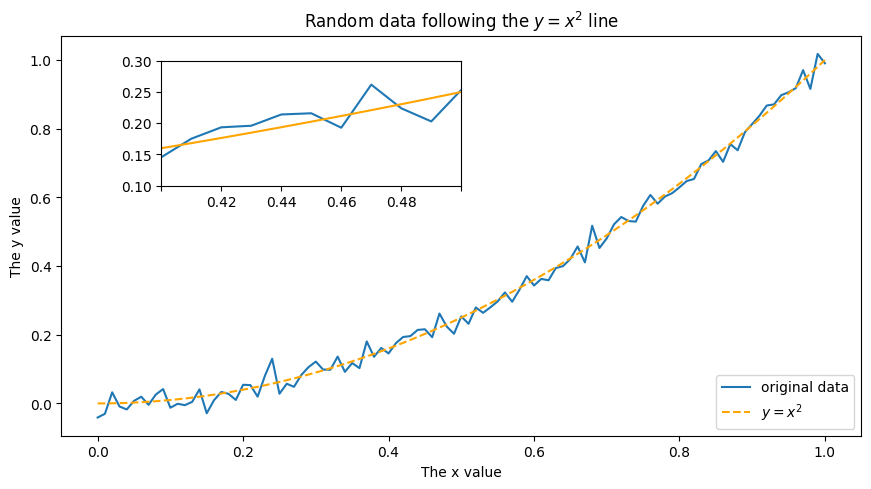

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

ax.plot(x,y, label='original data')
ax.plot(x,x**2,c='orange', linestyle='dashed', label='$y=x^2$')

plt.xlabel('The x value')
plt.ylabel('The y value')
plt.title('Random data following the $y=x^2$ line')

ax_inset = fig.add_axes([0.2, 0.6, 0.3, 0.25]) # left, bottom, width, height (range 0 to 1)

ax_inset.plot(x,y)
ax_inset.plot(x,x**2,c='orange')
ax_inset.set_xlim([0.4,0.5])
ax_inset.set_ylim([0.1,0.3])

ticks = ax_inset.set_xticks([0.4,0.42,0.44,0.46,0.48,0.5])
labels = ax_inset.set_xticklabels(['','0.42','0.44','0.46','0.48',''])

ax.legend(loc='lower right')
plt.show()

-----
## Seaborn
Other packages that are built on Matplotlib can simplify the process. We are going to look at the `seaborn` package. Let's load an actual dataset with both numerical and categorical data to see how these work.

In [2]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Now, let's make a scatterplot of the total bill compared to the tip left by the customer.

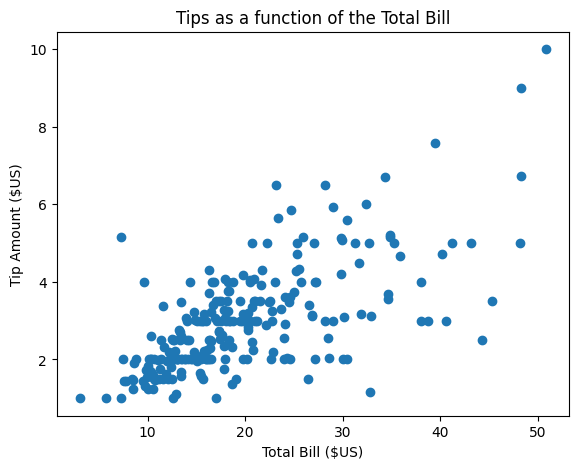

In [7]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.scatter(tips['total_bill'], tips['tip'])

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

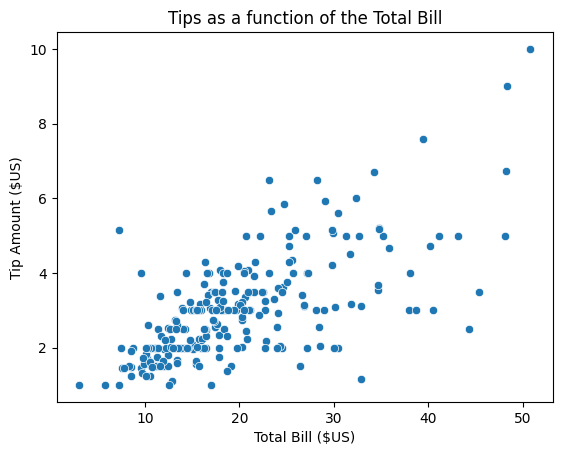

In [8]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

One thing that seaborn can do is highlight each point by a third variable. We can do this in matplotlib, but it's so much easier in seaborn.

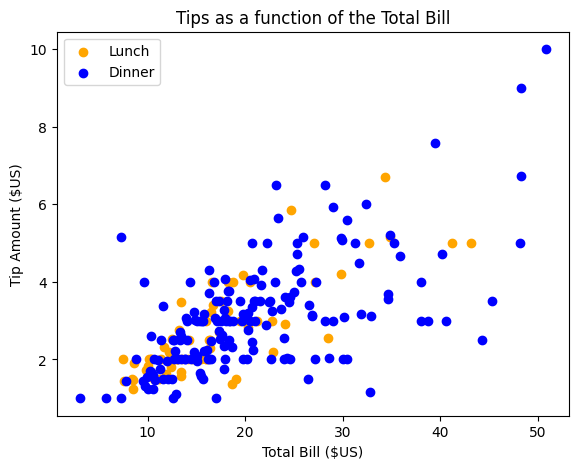

In [9]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.scatter(tips[tips['time'] == 'Lunch']['total_bill'],
           tips[tips['time'] == 'Lunch']['tip'],
           c='orange',
           label='Lunch')
ax.scatter(tips[tips['time'] == 'Dinner']['total_bill'],
           tips[tips['time'] == 'Dinner']['tip'],
           c='blue',
           label='Dinner')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.legend()
plt.show()

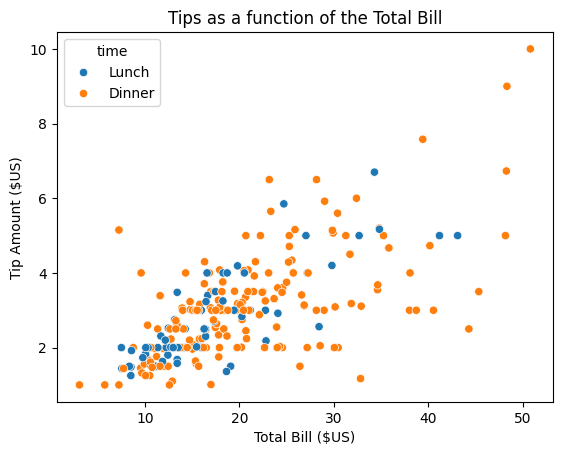

In [10]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

Other options that can be applied in both matplotlib and seaborn:
* Transparency
* Size

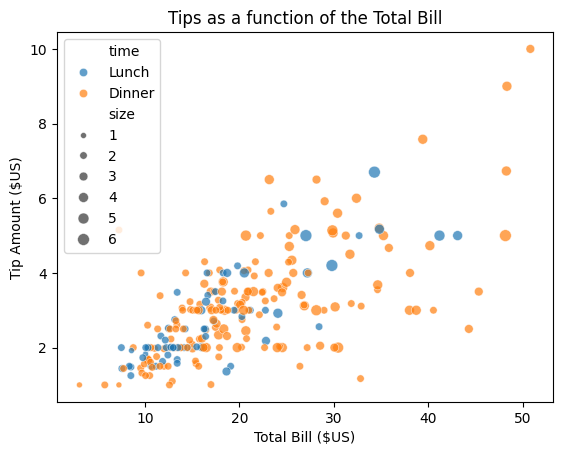

In [11]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time',
                alpha=0.7, size='size')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

We saw how to create one graph in one figure. We can also create multiple graphs.

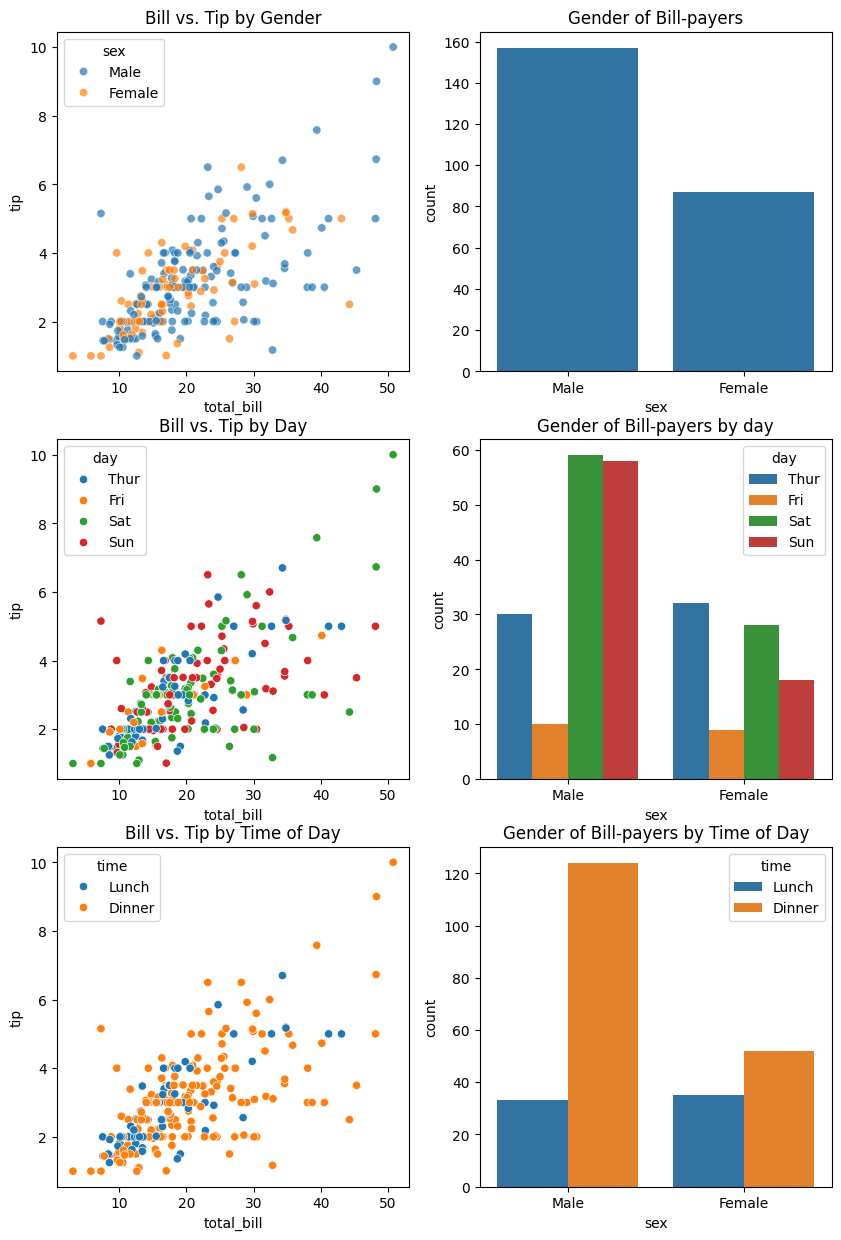

In [15]:
fig, ax = plt.subplots(3,2, figsize=(10,15)) # ax is an array of 3 axes

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', alpha=0.7, ax=ax[0,0])
ax[0,0].set_title('Bill vs. Tip by Gender')

sns.countplot(data=tips, x='sex', ax=ax[0,1])
ax[0,1].set_title('Gender of Bill-payers')

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', ax=ax[1,0])
ax[1,0].set_title('Bill vs. Tip by Day')

sns.countplot(data=tips, x='sex', hue='day', ax=ax[1,1])
ax[1,1].set_title('Gender of Bill-payers by day')
    
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=ax[2,0])
ax[2,0].set_title('Bill vs. Tip by Time of Day')

sns.countplot(data=tips, x='sex', hue='time', ax=ax[2,1])
ax[2,1].set_title('Gender of Bill-payers by Time of Day')

plt.show()

-----

## Colorschemes

We can change the colorschemes on these graphs. Changing the graph colorschemes often helps the graph become more readable. 

Let's start by changing the background. More information can be found on styling Seaborn graphs on the Seaborn website.
* https://seaborn.pydata.org/tutorial/aesthetics.html

<Axes: xlabel='total_bill', ylabel='tip'>

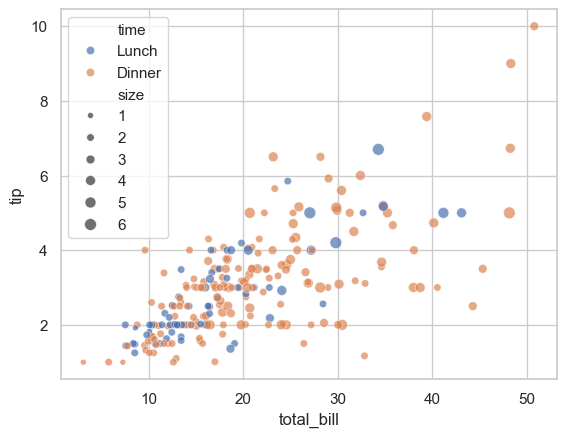

In [56]:
sns.set_theme(style="whitegrid")

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time',
                alpha=0.7, size='size')

Now, let's look at changing the color of the graphs themselves.

<Axes: xlabel='total_bill', ylabel='tip'>

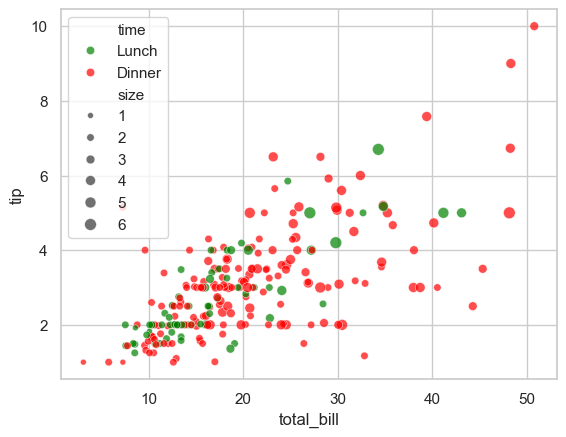

In [57]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time',
                alpha=0.7, size='size', palette=['green','red'])

Seaborn also has some built-in colorschemes. Available colorschemes can be found on the Seaborn website:
* https://seaborn.pydata.org/tutorial/color_palettes.html

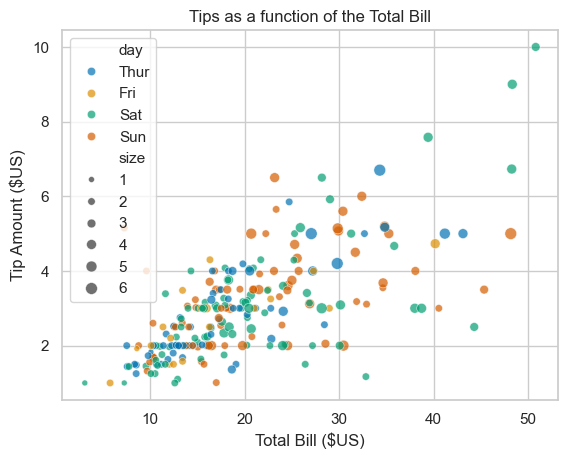

In [58]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day',
                alpha=0.7, size='size', palette='colorblind')

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

Some palettes have additional settings. We can save the color palette as a variable and use that.

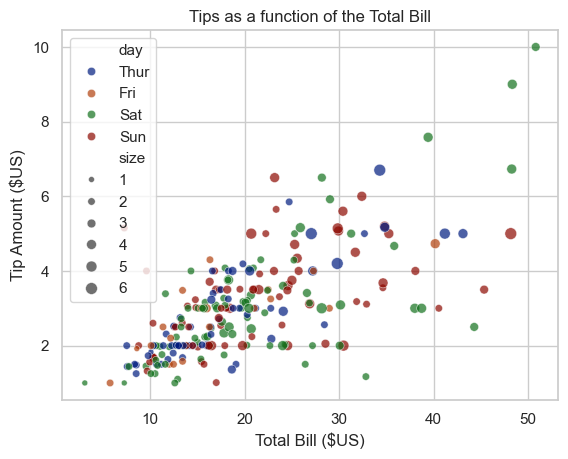

In [59]:
palette = sns.color_palette('dark', 4)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day',
                alpha=0.7, size='size', palette=palette)

plt.title('Tips as a function of the Total Bill')
plt.xlabel('Total Bill ($US)')
plt.ylabel('Tip Amount ($US)')

plt.show()

-----

## Statistics

## Types of Graphs

#### Categorical Graphs
* Bar graph
* Pie chart

#### Numerical
* Histogram
* KDE
* Boxplot
* Violinplot
* Scatterplot (Could be Categorical, but...)
* Timeseries
* Regplot
* 2D KDE
* Heatmap

Types of Scales

### Bar graph

<Axes: xlabel='day', ylabel='count'>

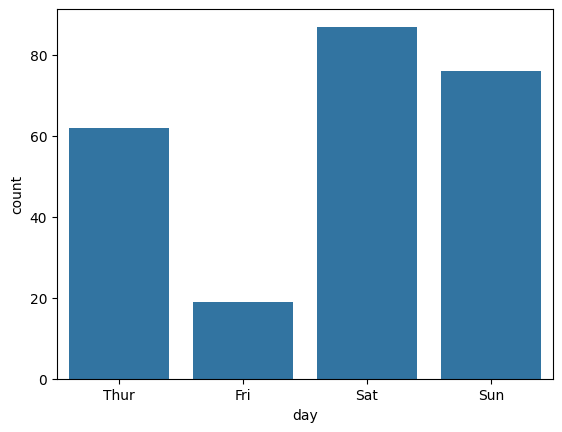

In [16]:
sns.countplot(data=tips, x='day')

<Axes: xlabel='day', ylabel='count'>

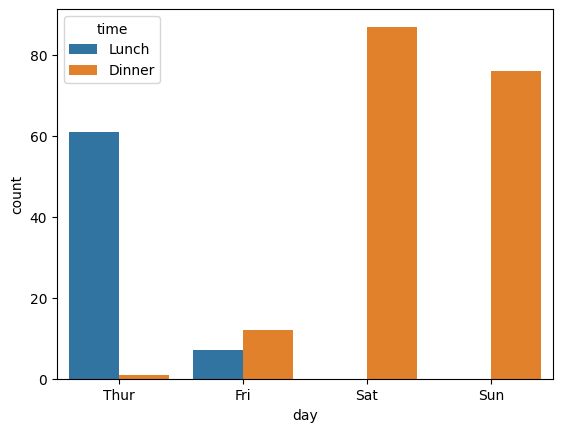

In [17]:
sns.countplot(data=tips, x='day', hue='time')

## Pie chart

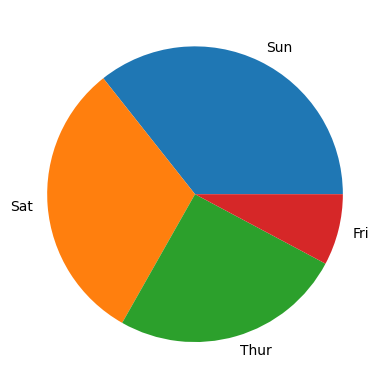

In [22]:
plt.pie(tips['day'].value_counts(), labels=tips['day'].unique())
plt.show()

## Histogram

<Axes: xlabel='tip', ylabel='Count'>

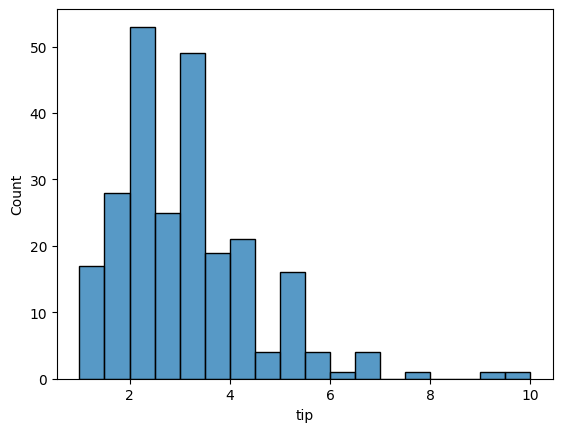

In [27]:
sns.histplot(data=tips, x='tip')

<Axes: xlabel='tip', ylabel='Count'>

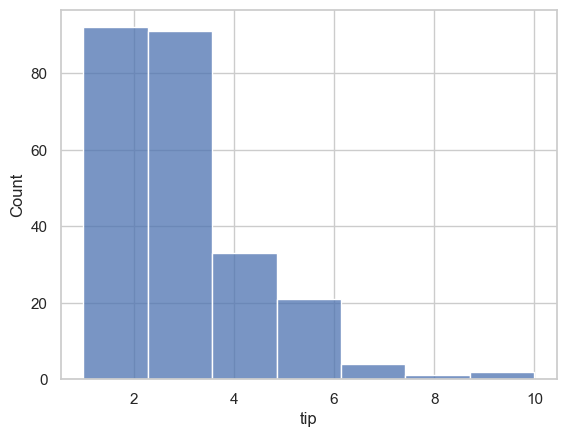

In [60]:
sns.histplot(data=tips, x='tip', bins=7)

<Axes: xlabel='tip', ylabel='Count'>

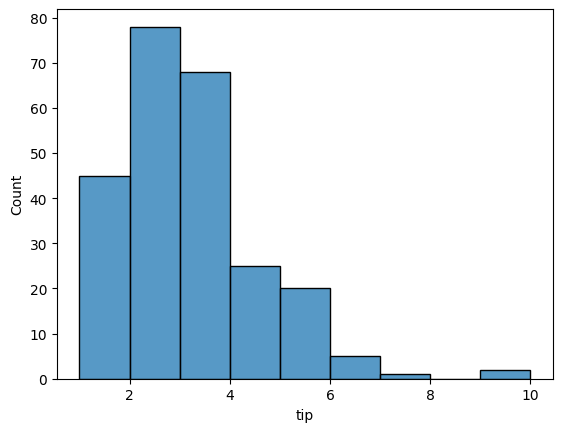

In [28]:
sns.histplot(data=tips, x='tip', binwidth=1)

## KDE Plot

<Axes: xlabel='tip', ylabel='Density'>

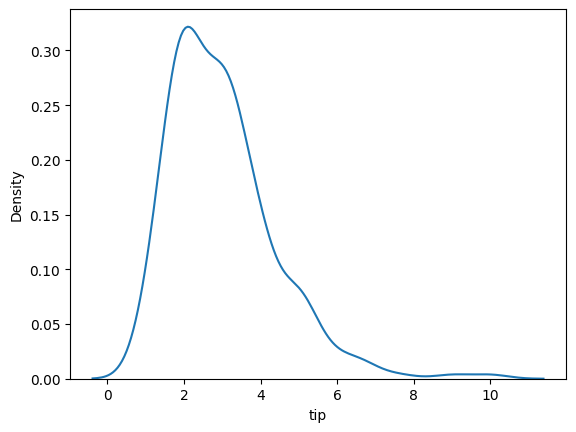

In [29]:
sns.kdeplot(data=tips, x='tip')

<Axes: xlabel='tip', ylabel='Count'>

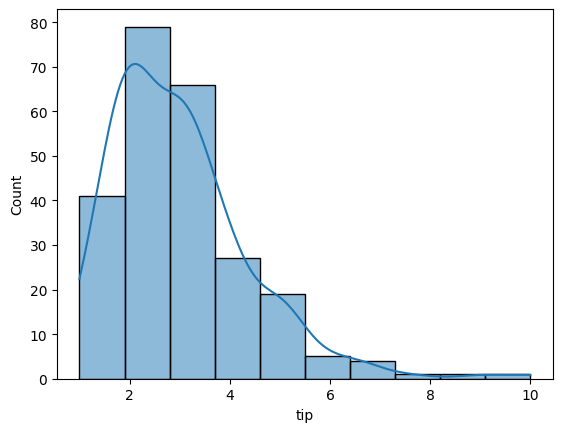

In [34]:
sns.histplot(data=tips, x='tip', bins=10, kde=True)

<Axes: xlabel='tip', ylabel='Density'>

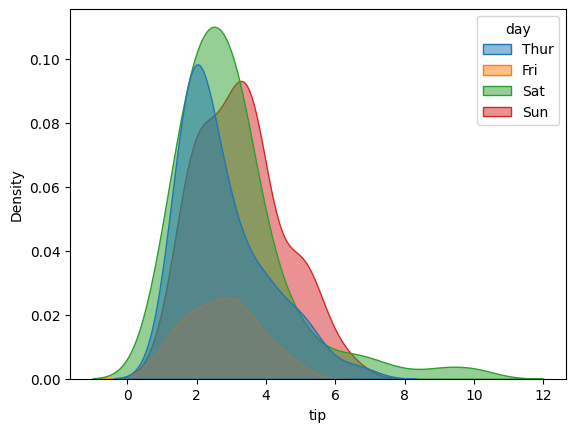

In [30]:
sns.kdeplot(data=tips, x='tip', fill=True, alpha=0.5, hue='day')

## 2D KDE Plot

<Axes: xlabel='total_bill', ylabel='tip'>

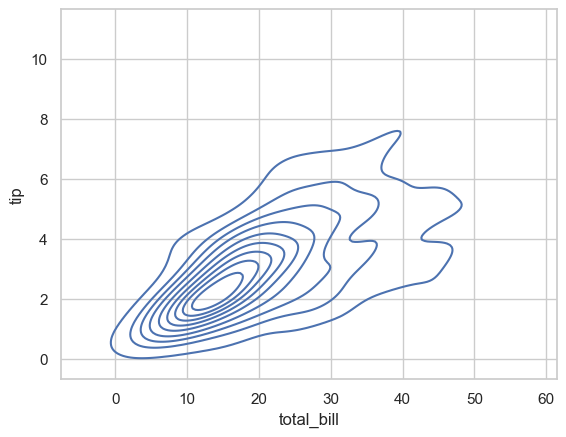

In [66]:
sns.kdeplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

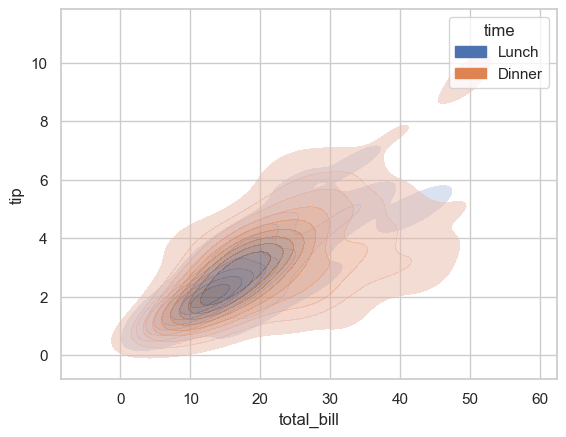

In [69]:
sns.kdeplot(data=tips, x='total_bill', y='tip', hue='time', fill=True, alpha=0.5)

## 5-number summary and boxplot

In [35]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: xlabel='tip'>

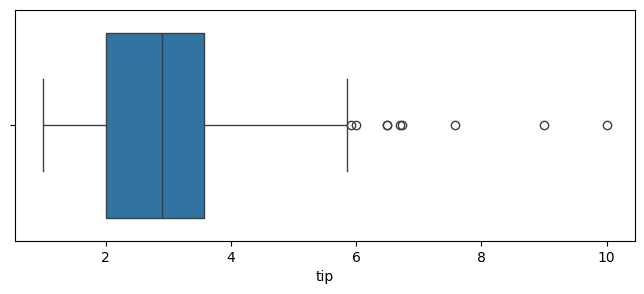

In [41]:
fig = plt.figure(figsize=(8,3))
sns.boxplot(data=tips, x='tip')

<Axes: xlabel='day', ylabel='tip'>

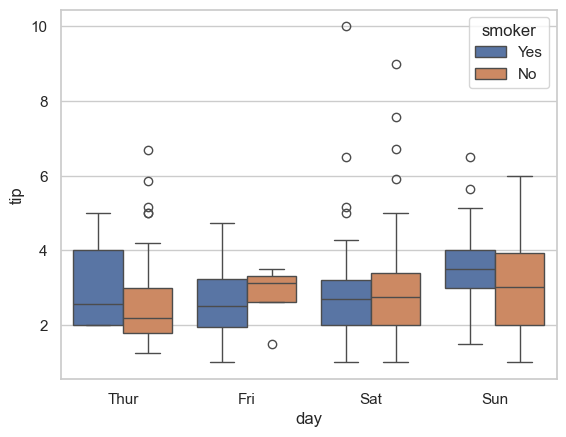

In [64]:
sns.boxplot(data=tips, y='tip', x='day', hue='smoker')

## Violinplot

<Axes: xlabel='day', ylabel='tip'>

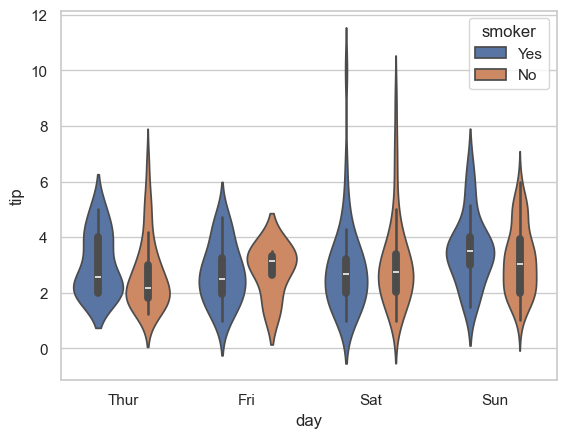

In [63]:
sns.violinplot(data=tips, y='tip', x='day', hue='smoker')

<Axes: xlabel='day', ylabel='tip'>

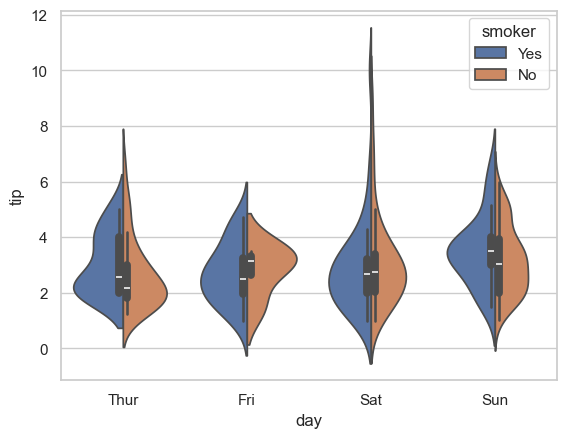

In [62]:
sns.violinplot(data=tips, y='tip', x='day', hue='smoker', split=True)

## Scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

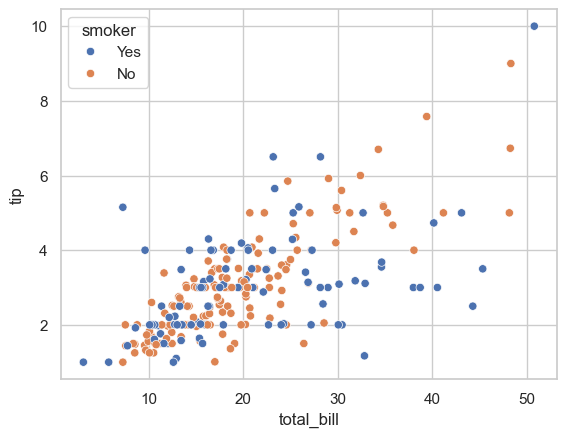

In [65]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker')

## Regplot

<Axes: xlabel='total_bill', ylabel='tip'>

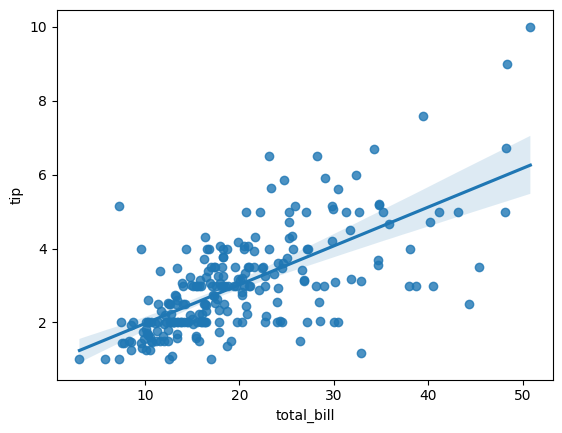

In [3]:
sns.regplot(data=tips, x='total_bill', y='tip')

### Rugplot

<Axes: xlabel='total_bill', ylabel='tip'>

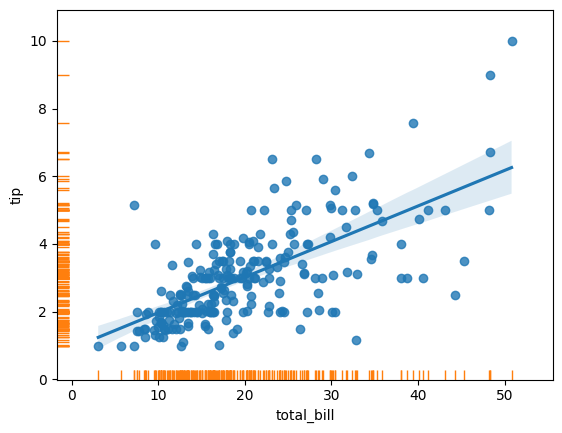

In [6]:
sns.regplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

## Timeseries

## Heatplot

## Pairplot

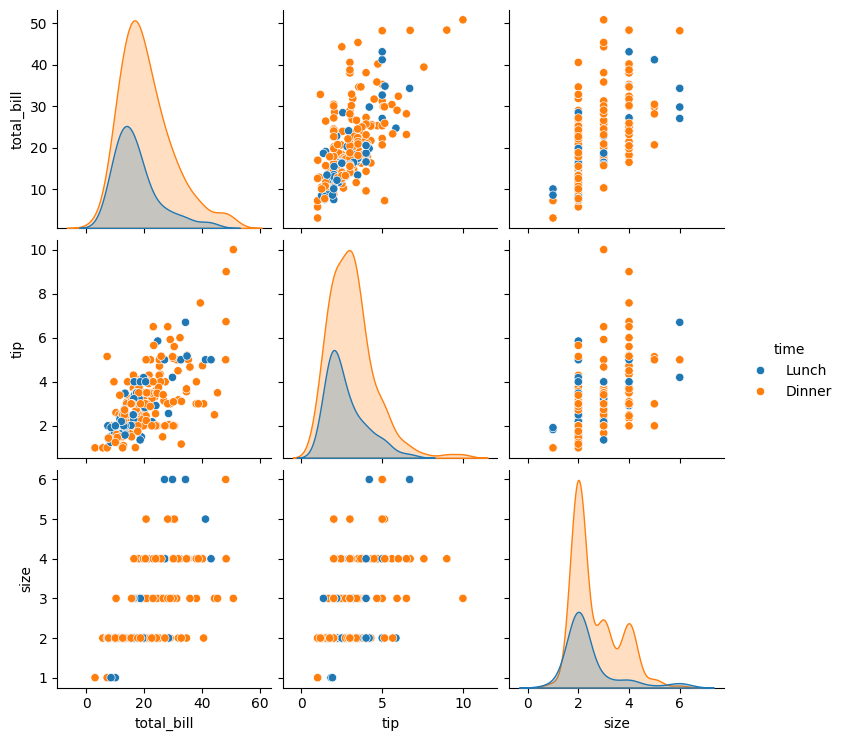

In [14]:
sns.pairplot(data=tips, hue='time')

### Pair Grid

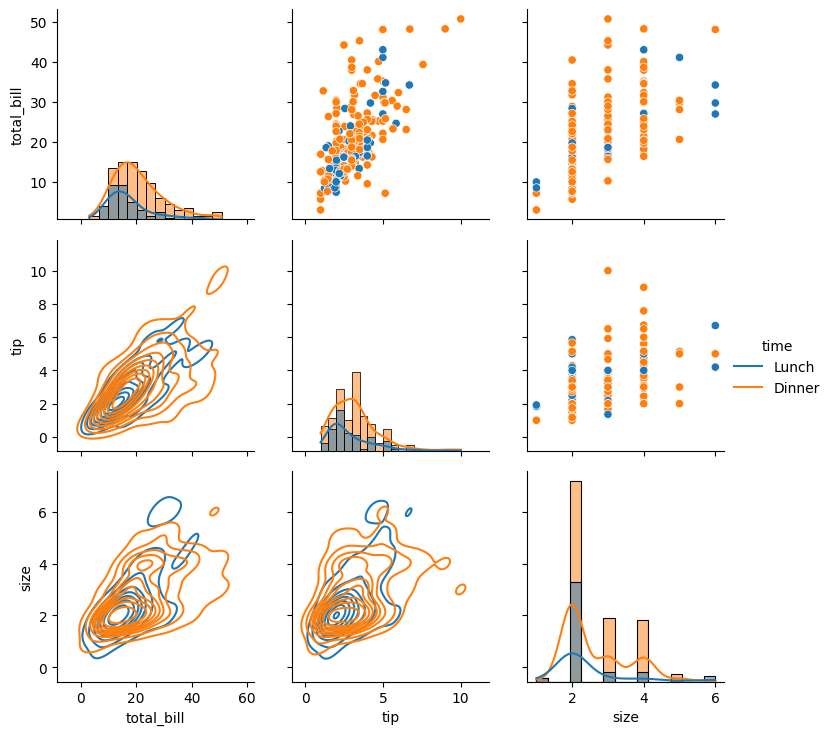

In [8]:
g = sns.PairGrid(data=tips, hue='time')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.add_legend()

## Jointplot

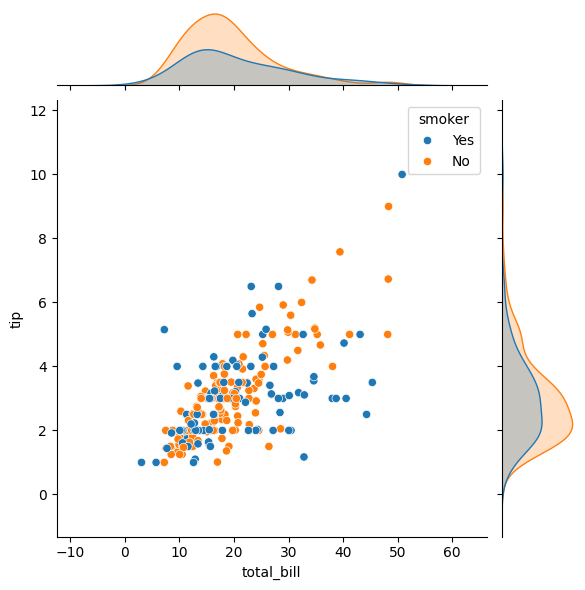

In [9]:
sns.jointplot(data=tips, x='total_bill', y='tip', hue='smoker')

### Joint Grid

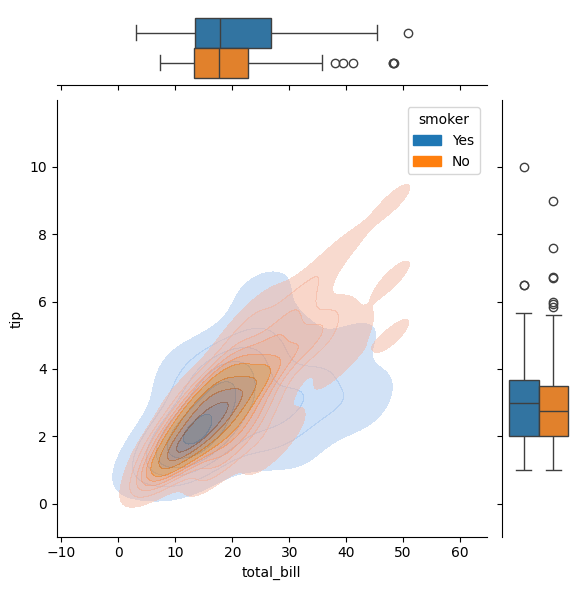

In [18]:
g = sns.JointGrid(data=tips, x='total_bill', y='tip', hue='smoker')
g.plot_joint(sns.kdeplot, fill=True, alpha=0.5)
g.plot_marginals(sns.boxplot)

* Timeseries
* Regplot
* Heatmap

-----
## Student's Play time
Can we predict a wizard's/witch's Hogwarts House based on hair color? eye color? ancestry?
* https://github.com/drolsonmi/math3080/tree/main/Datasets and select [HarryPotterCharacters.csv](https://raw.githubusercontent.com/drolsonmi/math3080/main/Datasets/HarryPotterCharacters.csv)
* https://www.kaggle.com/datasets/gulsahdemiryurek/harry-potter-dataset?select=shortversioncharacters.csv

Import a dataset that has quantitative and categorical variables

Still to cover:
* Scatterplots
* Histograms
* Boxplots
* Barplot (`.bar()` and `.barh()`)
* Timeseries
* Subplots
* Seaborn

```python
fig, ax = plt.subplots(1,3, sharey=True)
ax[0].plot()
ax[1].plot()
ax[2].plot()
```

```python
fig, ax = plt.subplots(2,3, sharey=False, sharex=True)
ax[0,0].plot() # Row 0, Column 0
ax[0,1].plot() # Row 0, Column 1
ax[1,0].plot() # Row 1, Column 0
ax[1,1].plot() # Row 1, Column 1
```

In [ ]:
import pandas as pd
co2 = pd.read_csv('../Datasets/co2_mm_mlo.csv', header=40)
co2.head()

In [ ]:
co2['date'] = co2['year'] + (co2['month']-1)/12
co2.head()

In [ ]:
import seaborn as sns
sns.lineplot(data=co2, x='decimal date', y='average')